In [2]:
!pip3 install torch torchvision

In [3]:
import torch

t1 = torch.tensor([1, 2, 3], dtype=torch.float)
print(t1)
print(t1.dtype)
print(t1.shape)
print(t1.size())
print(t1.dim()) # 깊이
print(t1.device)

tensor([1., 2., 3.])
torch.float32
torch.Size([3])
torch.Size([3])
1
cpu


In [4]:
t2 = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float)
print(t2)
print(t2.__class__)
print(t2.dtype)
print(t2.shape)
print(t2.size())
print(t2.dim()) # 깊이
print(t2.device)

tensor([[1., 2., 3.],
        [4., 5., 6.]])
<class 'torch.Tensor'>
torch.float32
torch.Size([2, 3])
torch.Size([2, 3])
2
cpu


In [5]:
# 0 또는 1로 tensor 생성
print(torch.ones(2, 3)) # 자료형 float32
print(torch.zeros(2, 3))

x = torch.tensor([[1,2,3], [4,5,6]])
print(torch.zeros_like(x))
print(torch.ones_like(x))

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])


In [6]:
# 난수 생성
# - 정규분포
print(torch.normal(10, 1, (2, 2)))
print(torch.rand((2, 2)))
print(torch.rand_like(x.float()))


# 균등분포

# 그 외

tensor([[10.6109, 11.4784],
        [10.2164,  9.3147]])
tensor([[0.8601, 0.0787],
        [0.0531, 0.7136]])
tensor([[0.2276, 0.5668, 0.7796],
        [0.5401, 0.7075, 0.7816]])


In [7]:
# uninitialized 데이터 반환
print(torch.empty(size=(2, 2)))

tensor([[2.3694e-38, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


In [8]:
# numpy ndarray 호환
import numpy as np

x = np.array([1, 2, 3])
print(x, type(x))

t = torch.from_numpy(x)
print(t, type(t))

# 넘파이는 CPU 기반이라 파이썬의 텐서를 써야하나 이미지 같은거 쓸때 가끔 ndarray가 필요함
x2 = t.numpy()
print(x2, type(x2))

[1 2 3] <class 'numpy.ndarray'>
tensor([1, 2, 3]) <class 'torch.Tensor'>
[1 2 3] <class 'numpy.ndarray'>


In [9]:
### 연산
a = torch.tensor([[1,2,3],[4,5,6]], dtype=torch.float)
b = torch.tensor([[7,8,9],[10,11,12]], dtype=torch.float)
c = torch.tensor([[1,2],[3,4],[5,6]], dtype=torch.float)

print(a.shape, b.shape, c.shape)

torch.Size([2, 3]) torch.Size([2, 3]) torch.Size([3, 2])


In [10]:
# 같은 shape끼리 연산
print(a + b)
print(a - b)
print(a * b)
print(a / b)
print(a // b)
print(a % b)

tensor([[ 8., 10., 12.],
        [14., 16., 18.]])
tensor([[-6., -6., -6.],
        [-6., -6., -6.]])
tensor([[ 7., 16., 27.],
        [40., 55., 72.]])
tensor([[0.1429, 0.2500, 0.3333],
        [0.4000, 0.4545, 0.5000]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [11]:
# broadcasting 연산
print(a + 1)
print(a + torch.tensor([10, 20, 30]))
# print(a + torch.tensor([10, 20])) # 마지막 축부터 검사: 1 또는 숫자가 같지 않은 경우 브로드캐스팅 불가

tensor([[2., 3., 4.],
        [5., 6., 7.]])
tensor([[11., 22., 33.],
        [14., 25., 36.]])


In [12]:
# 내적 (모든 원소간의 곱을 더하기)
# - 1차원: torch.dot(), torch.matmul(), @
# - 2차원이상: torch.dot은 불가, torch.matmul(), @ 만 가능

# 1차원
m = torch.tensor([1, 2, 3])
n = torch.tensor([4, 5, 6])
print(m.dot(n))
print(torch.dot(m, n))
print(torch.matmul(m, n))
print(m @ n)

# 2차원 이상
print(torch.matmul(a, c))
print(a @ c)
# print(torch.dot(a, c)) # 에러남

tensor(32)
tensor(32)
tensor(32)
tensor(32)
tensor([[22., 28.],
        [49., 64.]])
tensor([[22., 28.],
        [49., 64.]])


# 통계연산
- 축을 지정해서 연산하는 sum, mean, max, min 등

In [13]:
# 합계
print(a)
print(torch.sum(a, dim=0))
print(torch.sum(a, dim=1))
print(torch.sum(a, dim=None))
# print(torch.sum(a, axis=0)) # axis도 에러는 안나지만 dim 권장

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([5., 7., 9.])
tensor([ 6., 15.])
tensor(21.)


### 형변환
- astype 대신 해당 자료형 메서드 호출

In [14]:
x = torch.tensor([1, 2, 3])
print(x, x.dtype)

print(x.float(), x.float().dtype)
print(x.double(), x.double().dtype)
print(x.int(), x.int().dtype)
print(x.long(), x.long().dtype)

tensor([1, 2, 3]) torch.int64
tensor([1., 2., 3.]) torch.float32
tensor([1., 2., 3.], dtype=torch.float64) torch.float64
tensor([1, 2, 3], dtype=torch.int32) torch.int32
tensor([1, 2, 3]) torch.int64


### 형태변경

In [15]:
t = torch.arange(12)

t_ = t.reshape(3, 4)
t_ = t.reshape(3, -1)
t_ = t.reshape(-1, 4)
t_ = t.reshape(2, 2, 3)

print(t_, '\n', t_.size())

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]]) 
 torch.Size([2, 2, 3])


In [16]:
# 전치
t = torch.arange(12).reshape(3, 4)
print(t.T, t.T.shape)
print(t.transpose(0, 1), t.transpose(0, 1).shape) # 0차원과 1차원을 바꾸라는것. T와 동일

tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]) torch.Size([4, 3])
tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]]) torch.Size([4, 3])


In [17]:
# 평탄화
print(t.flatten())
print(t.reshape(-1))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])


In [18]:
# 차원 축소 squeeze()
x = torch.tensor([[1, 2], [3,4]])
print(x.size())

print(x.squeeze(0), x.squeeze(0).shape)

torch.Size([2, 2])
tensor([[1, 2],
        [3, 4]]) torch.Size([2, 2])


In [19]:
# 차원 추가 unsqueeze()
x = torch.tensor([[1, 2], [3,4]])
print(x.size())

x_ = x.unsqueeze(0) # 맨앞에 차원추가
print(x_.size())
print(x_)

x_ = x.unsqueeze(-1) # 맨뒤에 차원추가
print(x_.size())
print(x_)

x_ = x.unsqueeze(1) # 두번째에 차원추가
print(x_.size())
print(x_)

torch.Size([2, 2])
torch.Size([1, 2, 2])
tensor([[[1, 2],
         [3, 4]]])
torch.Size([2, 2, 1])
tensor([[[1],
         [2]],

        [[3],
         [4]]])
torch.Size([2, 1, 2])
tensor([[[1, 2]],

        [[3, 4]]])


### Indexing | Slicing

In [20]:
x = torch.arange(1, 13).reshape(3, 2, 2)
x

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])

In [21]:
print(x[0])
print(x[1][0])
print(x[2][1])
print(x[-1][-1][-1])

tensor([[1, 2],
        [3, 4]])
tensor([5, 6])
tensor([11, 12])
tensor(12)


In [22]:
# slicing
print(x)
x_ = x[:, 0] # 인덱싱 사용 1차원 제거 torch.Size([3, 2])
# x_ = x[:, :1] # 슬라이싱은 차원유지 torch.Size([3, 1, 2])
print(x_)
print(x_.shape)

tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])
tensor([[ 1,  2],
        [ 5,  6],
        [ 9, 10]])
torch.Size([3, 2])


In [23]:
# fancy indexing
index = [1, 2]
x_ = x[index]
print(x_)

tensor([[[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])


### 유용한 메서드

In [24]:
# split
# - 지정한 개수로 분할, 마짐가 지정한 개수보다 작을 수 있다.
x = torch.zeros(10, 4)

x_splits = torch.split(x, 4)

for x_ in x_splits:
    print(x_)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [25]:
# expand
k = torch.tensor([[[1, 2]], [[3, 4]]])
print(k.shape)

k_exp = k.expand(2, 3, 2)
print(k_exp)
print(k_exp.shape)
print(k.shape)

torch.Size([2, 1, 2])
tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])
torch.Size([2, 1, 2])


In [26]:
# 원본배열 K의 view 형태로 k_exp가 생성된 것
# - k_exp가 k를 참조. k_exp 변경 시 원본도 변경
k_exp[0, 0, 0] = 100
print(k_exp)
print(k)

tensor([[[100,   2],
         [100,   2],
         [100,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
tensor([[[100,   2]],

        [[  3,   4]]])


In [27]:
# repeat 원본배열의 view 생성없이 실제 값복사
k = torch.tensor([[[1, 2]], [[3, 4]]])
print(k.shape)

k_rep = k.repeat(1, 3, 1) # 두번째 차원만 repeat 3번
print(k_rep)
print(k_rep.shape)

k_rep[0, 0, 0] = 100
print(k_rep)
print(k)

torch.Size([2, 1, 2])
tensor([[[1, 2],
         [1, 2],
         [1, 2]],

        [[3, 4],
         [3, 4],
         [3, 4]]])
torch.Size([2, 3, 2])
tensor([[[100,   2],
         [  1,   2],
         [  1,   2]],

        [[  3,   4],
         [  3,   4],
         [  3,   4]]])
tensor([[[1, 2]],

        [[3, 4]]])


In [28]:
# masked_fill: mask 조건식이 true인 경우만 값 변경
x = torch.arange(9).reshape(3, -1)
print(x)

mask = x > 4
print(mask)

# mask에 따라 True인 x의 indices에 value를 채움
x_ = x.masked_fill(mask, value=0)
print(x_)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
tensor([[False, False, False],
        [False, False,  True],
        [ True,  True,  True]])
tensor([[0, 1, 2],
        [3, 4, 0],
        [0, 0, 0]])


---
## 다차원 텐서 (다차원 배열)

### 다차원 배열의 계산 복습

In [29]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8, 9], [10, 11, 12]])

add_result = A + B

vec = np.array([1, 2, 3])
add_result2 = A + vec # 브로드캐스팅

print(add_result)
print(add_result2)

dot_result = A.dot(B.T)
print(dot_result)

[[ 8 10 12]
 [14 16 18]]
[[2 4 6]
 [5 7 9]]
[[ 50  68]
 [122 167]]


### 다층 퍼셉트론

In [30]:
X = np.random.rand(6, 10) # 10개 피처, 6개 인스턴스

# 은닉층
w1 = np.random.randn(10, 8) # 10개의 입력(피처)를 8개의 뉴런으로
b1 = np.random.randn(1, 8) # 각 뉴런당 편향 1개

# 출력층
w2 = np.random.randn(8, 4) # 8개의 입력(피처)를 4개의 뉴런으로
b2 = np.random.rand(1, 4) # 각 뉴런당 편향 1개

# 은닉층 계산 (선형 계산 + tanh 활성함수)  # 선형 계산 = 입력값 x 가중치 + 편향
z1 = np.dot(X, w1) + b1
result1 = np.tanh(z1)

# 출력층 계산 (선형 계산 + softmax 활성함수)
z2 = np.dot(result1, w2) + b2
exp_z = np.exp(z2 - np.max(z2, axis=1, keepdims=True)) # 컴퓨터가 표현불가한 큰 수가 안 생기게 max로 뺌
result2 = exp_z / np.sum(exp_z, axis=1, keepdims=True)

print(result2)

[[0.56590748 0.01975648 0.20850395 0.20583209]
 [0.68481035 0.02090591 0.0182694  0.27601434]
 [0.43026563 0.01287952 0.15270791 0.40414693]
 [0.58494331 0.01682927 0.03784479 0.36038263]
 [0.72596522 0.01193869 0.03035631 0.23173977]
 [0.42913597 0.02949234 0.05037628 0.49099542]]


### 이미지 데이터 예시


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-3.7385893924227287..3.1971748374649915].


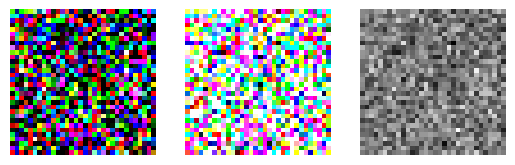

In [ ]:
import matplotlib.pyplot as plt

# 이미지 생성
batch_size = 5  # 샘플 수
channels = 3    # rgb값. png이미지는 투명도까지해서 4임
height = 32     # 픽셀 수
width = 32      # 픽셀 수

images = np.random.randn(batch_size, channels, height, width)

bright_images = np.clip(images + 1, 0, 1) # 모든 값에 0.2씩 더함 (최대 1)
gray_images = np.mean(images, axis=1) # 2번째 차원(채널수)를 기준으로 평균

# pytorch 프레임워크에서는 이미지 데이터를 (채널, 높이, 너비) 순서로 저장
# matplotlib.pyplot.imshow()는 (높이, 너비, 채널) 순서
# transpose()로 축의 순서 재배열
images_for_display = images[0].transpose(1, 2, 0) # 0번째 차원이던 채널을 뒤로 이동
bright_images_display = bright_images[0].transpose(1, 2, 0)

plt.subplot(1, 3, 1)
plt.imshow(images_for_display)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(bright_images_display)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gray_images[0], cmap='gray')
plt.axis('off')


plt.show()